In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import seaborn as sns

In [7]:
data.columns

Index(['Month', 'Sub Market L1', 'Country Code', 'Country', 'd_budget_type',
       'd_key_budgettype', 'BU Name', 'Campaign', 'Platform', 'd_placement',
       'Impressions', 'Clicks', 'Spend', 'Cons SU', 'Cons NNA', 'Merc SU',
       'Merc NNA', 'Total SU', 'Total NNA'],
      dtype='object')

In [3]:
data["Platform"].unique()

array(['Google Adwords', 'DV360', 'TWITCH', 'YOUTUBE',
       'Facebook / Instagram', 'LinkedIn', 'GDN', 'The Trade Desk',
       'VERIZON MEDIA GROUP', '-', 'Outbrain', 'INSTAGRAM', 'Microad',
       'Google Adwords UAC', 'Twitter', 'LiveIntent', 'Yahoo', 'Web.de',
       'Apple Search'], dtype=object)

In [8]:
def change_insta(platform):
    if platform == "Google Adwords UAC":
        return "Google Adwords"
    if platform == "INSTAGRAM":
        return "Facebook / Instagram"
    return platform
    
    
data["Platform"] = data["Platform"].apply(change_insta)
data["Platform"].unique()

array(['Google Adwords', 'DV360', 'TWITCH', 'YOUTUBE',
       'Facebook / Instagram', 'LinkedIn', 'GDN', 'The Trade Desk',
       'VERIZON MEDIA GROUP', '-', 'Outbrain', 'Microad', 'Twitter',
       'LiveIntent', 'Yahoo', 'Web.de', 'Apple Search'], dtype=object)

In [9]:
len(data[data["Platform"] == "-"])

5613

In [10]:
data['Platform'] = np.where( data['d_placement'].str.contains("NKW"),  "NAVER",data['Platform'])
data['Platform'] = np.where( data['d_placement'].str.contains("NAVER"),  "NAVER",data['Platform'])
data['Platform'] = np.where( data['Campaign'].str.contains("GOOGLEUACHK"),  "Google Adwords",data['Platform'])
data['Platform'] = np.where( data['Campaign'].str.contains("GUMGUM"),  "GumGum",data['Platform'])
data['Platform'] = np.where( data['Platform']== "-",  "SEM",data['Platform'])

In [11]:
len(data[data["Platform"] == "-"])

0

In [12]:
data_trimmed = data[["Month","Country", "Spend","Platform", "Total NNA"]]
aggregate_data =data_trimmed.groupby(["Month","Country","Platform"]).sum()
aggregate_data = aggregate_data.reset_index()
aggregate_data = aggregate_data.drop("Month",1)
aggregate_data.head()

,Country,Platform,Spend,Total NNA
0,Anguilla,Google Adwords,2.06,4.0
1,Antigua And Barbuda,Google Adwords,42.38,13.0
2,Argentina,DV360,7907.68,80.0
3,Argentina,Google Adwords,10879.50,1335.0
4,Aruba,Google Adwords,31.81,31.0


In [9]:
df_dum = pd.get_dummies(aggregate_data)
X= df_dum.drop("Total NNA", 1)
y = df_dum["Total NNA"].values

#### Multiple Linear Regression

In [10]:
lm = LinearRegression()
np.mean(cross_val_score(lm, X, y, scoring= "neg_mean_absolute_error", cv= 5))

-1118.4926648428461

In [11]:
lm_final = LinearRegression()
lm_final.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lm_final.coef_

array([ 1.96922867e-02, -9.13091197e+02, -9.07843955e+02,  7.74799488e+02,
       -8.97321000e+02, -9.15208251e+02,  4.51946653e+03, -6.39786016e+02,
       -9.05235886e+02,  1.38350105e+03,  2.17389201e+02,  4.17874539e+02,
       -4.85441107e+02, -6.02315295e+02, -4.14362487e+02, -4.21413377e+01,
       -9.07119542e+02, -4.69242722e+02,  1.27240406e+02, -7.24777563e+02,
        3.95982935e+01, -4.72126554e+02, -7.66574501e+02, -3.37308792e+02,
       -1.42877919e+01,  5.36222234e+02,  1.07153405e+03,  2.51694821e+02,
       -8.30118997e+02,  2.90649984e+02,  3.97320110e+02, -1.04118815e+02,
        4.80532886e+02,  3.86372127e+03, -8.27949909e+02, -9.06683284e+02,
       -7.57895882e+02, -8.37739659e+02,  9.68091277e+02,  1.71604794e+03,
        1.83269054e+02, -7.77931738e+02,  1.98920630e+02,  3.27015505e+02,
       -9.00781245e+02,  1.18426795e+02, -5.63801245e+02, -2.11895622e+02,
       -6.37673283e+02, -1.40848750e+02,  9.31981240e+01, -2.38072969e+01,
       -5.69673172e+02,  

#### Lasso Regression

In [13]:
lm_lasso = Lasso()
np.mean(cross_val_score(lm_lasso, X, y, scoring= "neg_mean_absolute_error", cv= 5))

-1116.8402437560596

In [14]:
alpha = []
error = []
for i in range(1,1000):
    alpha.append(i/100)
    lm_las = Lasso(alpha = (i/100),max_iter=100000)
    error.append(np.mean(cross_val_score(lm_las, X, y, scoring= "neg_mean_absolute_error", cv= 5)))

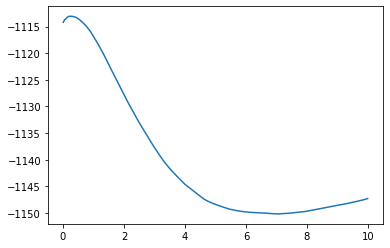

In [15]:
err = tuple(zip(alpha, error))
plt.plot(alpha,error)

In [16]:
df_lasso_error = pd.DataFrame(err, columns = ["alpha","error"])
df_lasso_error[df_lasso_error.error == max(df_lasso_error.error)]

,alpha,error
25,0.26,-1113.069065


#### Random Forests

In [17]:
rf =  RandomForestRegressor()
np.mean(cross_val_score(rf, X, y, scoring ="neg_mean_absolute_error", cv= 5))



-572.2259001723535

In [18]:
parameters = {"n_estimators":[50,100,200,300,500],'criterion':['mae'],'max_features':['auto','sqrt','log2']}
gs  = GridSearchCV(rf, parameters, scoring = "neg_mean_absolute_error", cv = 3)
gs.fit(X, y)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [19]:
gs.best_score_ ,gs.best_params_, gs.best_estimator_


(-569.9901605209459,
 {'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 100},
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

#### Random Forests with the above hyperparameter performs the best with an MAE of ~560 NNA. Any upcoming campaigns' NNA outcome can be predicted through this.
